# 単回帰分析の実装

In [1]:
# データ読み込み
df = pd.read_csv('sample.csv')
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [5]:
# データを中心化する
df_c = df - df.mean()
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.989520e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


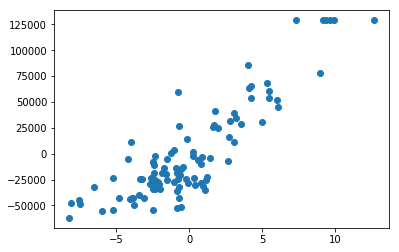

In [8]:
# データを抽出
x = df_c['x']
y = df_c['y']

plt.scatter(x, y)
plt.show()
%matplotlib inline

## パラメータ(傾き)aは次式より
$$
a = \dfrac{\displaystyle{\sum_{n=1}^{N}}x_{n}y_{n}}
{\displaystyle{\sum_{n=1}^{N}}x_{n}^{2}}
$$

In [9]:
xx = x * x
xy = x * y

a = xy.sum()/xx.sum()
a

10069.022519284063

/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


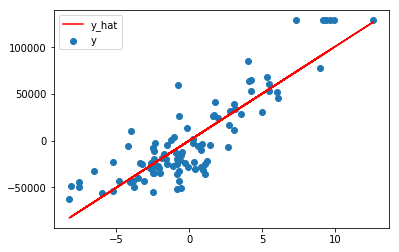

In [14]:
plt.scatter(x,y, label='y') # 実測値
plt.plot(x,a*x, label='y_hat', color='red') # 予測値
plt.legend()
plt.show()

## 予測値の計算

- $y$が予測値
- $x$は入力値
- ${\bar x}$はデータの平均値
- $y - {\bar y}$は中心化されたモデルなので元のスケールに戻す必要がある
$$
\begin{align}
y - {\bar y} &= a ( x - { \bar x}) \\
\rightarrow y &= a ( x - { \bar x}) + {\bar y}
\end{align}
$$ 